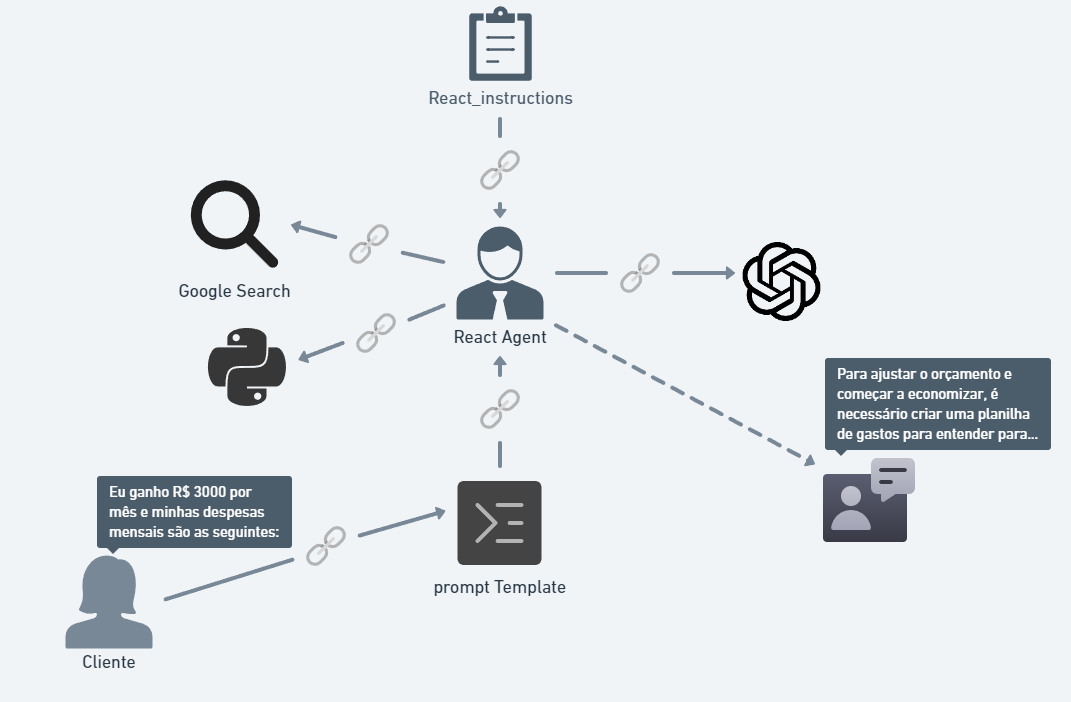

In [1]:
!pip install langchain
!pip install langchain-openai
!pip install python-dotenv
!pip install langchain-community

# Seput

In [1]:
from langchain.prompts import PromptTemplate
from langchain import hub
from langchain.agents import Tool, AgentExecutor, initialize_agent, create_react_agent
from langchain_community.utilities import GoogleSearchAPIWrapper
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

# Acessar as variáveis de ambiente
openai_api_key = os.getenv("OPENAI_API_KEY")
google_api_key = os.getenv("GOOGLE_API_KEY")
google_cse_id = os.getenv("GOOGLE_CSE_ID")

In [3]:
OPENAI_API_KEY = openai_api_key
openai = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=OPENAI_API_KEY, temperature=0)

# Assistente Financeiro Pessoal

In [38]:
prompt = """
    Como assistente financeiro pessoal, ajude a responder as seguintes perguntas com ajuda da internet.
    voce deve Retorne o contudo encontrado do website pesquisado e o link da pagina como topicos como dicas 
    para auxiliar sua explicação.
    Pergunta: {q}
"""

In [39]:
#gerando o prompt
prompt_template = PromptTemplate.from_template(prompt)
print(prompt_template)

input_variables=['q'] template='\n    Como assistente financeiro pessoal, ajude a responder as seguintes perguntas com ajuda da internet.\n    voce deve Retorne o contudo encontrado do website pesquisado e o link da pagina como topicos como dicas \n    para auxiliar sua explicação.\n    Pergunta: {q}\n'


- criando as instruções do agent com base no prompt do hub do langchain

In [40]:
react_instructions = hub.pull('hwchase17/react')
print(react_instructions)

c:\Users\DioenD\anaconda3\envs\Langchain\Lib\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'] metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'} template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'


# Ferramentas - Tools

In [41]:
# Ferramenta 1 python REPL
python_repl = PythonREPLTool()
python_repl_tool = Tool(
    name='Python REPL',
    func=python_repl.run,
    description="""
        Qualquer tipo de cálculo deve usar esta ferramenta. Você não deve realizar o cálculo diretamente. 
        Você deve inserir código Python.
    """
)

In [42]:
# Ferramenta 2 google search
google_search = GoogleSearchAPIWrapper()
google_search_tool = Tool(
    name="google search tool",
    func=google_search.run,
    description="""
        Útil para encontrar informações e dicas de economia e opções de investimento.
        Você sempre deve pesquisar na internet as melhores dicas usando esta ferramenta.
    """
)

In [43]:
tools = [python_repl_tool, google_search_tool]
agent = create_react_agent(openai, tools, react_instructions)

In [44]:
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=10
)

In [45]:
print(agent_executor)

verbose=True agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], partial_variables={'tools': "Python REPL(tool_input: 'Union[str, Dict[str, Any]]', verbose: 'Optional[bool]' = None, start_color: 'Optional[str]' = 'green', color: 'Optional[str]' = 'green', callbacks: 'Callbacks' = None, *, tags: 'Optional[List[str]]' = None, metadata: 'Optional[Dict[str, Any]]' = None, run_name: 'Optional[str]' = None, run_id: 'Optional[uuid.UUID]' = None, config: 'Optional[RunnableConfig]' = None, tool_call_id: 'Optional[str]' = None, **kwargs: 'Any') -> 'Any' - \n        Qualquer tipo de cálculo deve usar esta ferramenta. Você não deve realizar o cálculo diretamente. \n        Você deve inserir código Python.\n    \ngoogle search tool(query: str) -> str - \n        Útil para encontrar informações e dicas de economia e opções de investimento.\n    

In [46]:
question = """
    Eu ganho R$ 3000 por mês mas o total de minhas despesas é de R$1800 mais 500 de aluguel.
    Como posso ajustar meu orçamento para economizar dinheiro ?
"""

In [50]:
output = agent_executor.invoke({
    'input': prompt_template.format(q=question)
})



> Entering new AgentExecutor chain...
Vou usar a ferramenta de pesquisa do Google para encontrar dicas sobre como ajustar um orçamento para economizar dinheiro.
Action: google search tool
Action Input: "dicas para ajustar orçamento e economizar dinheiro"May 7, 2020 ... 6 dicas para economizar dinheiro e ajustar o orçamento familiar · 1. Faça uma pausa nos financiamentos · 2. Reduza o consumo de energia e água ... Mar 19, 2024 ... Para ajudar em todo esse processo, fizemos um conteúdo especial em que damos dicas sobre o planejamento não apenas financeiro, mas também da ... Apr 24, 2024 ... ... ajustar a quantia poupada mensalmente. O segredo está em criar um orçamento realista e priorizar o equilíbrio entre as necessidades atuais e ... Mar 7, 2018 ... ... ajustar o orçamento doméstico para poupar para a ... dinheiro que entra a mais não deve ser considerado como parte do orçamento doméstico. Aug 9, 2024 ... Economizar dinheiro mensalmente requer disciplina e planejamento. ... Não ajus

In [53]:
print(output['input'])


    Como assistente financeiro pessoal, ajude a responder as seguintes perguntas com ajuda da internet.
    voce deve Retorne o contudo encontrado do website pesquisado e o link da pagina como topicos como dicas 
    para auxiliar sua explicação.
    Pergunta: 
    Eu ganho R$ 3000 por mês mas o total de minhas despesas é de R$1800 mais 500 de aluguel.
    Como posso ajustar meu orçamento para economizar dinheiro ?




In [54]:
print(output['output'])

Dicas para ajustar o orçamento e economizar dinheiro: Faça uma pausa nos financiamentos, Reduza o consumo de energia e água, Crie um orçamento realista, Revise e ajuste seu orçamento regularmente, Estabeleça metas para economizar, Evite gastos desnecessários, Reserve 30% da sua renda mensal.
